##  Face recognition based on norm 2

#### In this project, I try to design a simple face recognition based on norm 2. the pictures of 40 person's fase was taken in gray type.
#### Each person have a 10 defferent pictures and so our databas have a 200 pictures.

In [1]:
from PIL import Image
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math


In [2]:
def minIndex(A):
    mi = 0
    for i in range(len(A)):
        if A[i] < A[mi]:
            mi = i
    return mi

In [3]:
m=input("please choose the person:  ")
n=input("please choose the picture, n> 5:  ")


please choose the person:  1
please choose the picture, n> 5:  3


You choosed this picture:


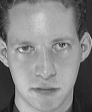

In [4]:
my_str= "orlfaces/s{}/{}.pgm".format(m,n)
my_pic5=Image.open(my_str)
print("You choosed this picture:")
my_pic5

In [5]:

selected_image= cv.imread(my_str, cv.IMREAD_GRAYSCALE)
selected_image_normalize = cv.normalize(selected_image.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)


In [6]:


selected_image_normalize=np.reshape(selected_image_normalize,(10304,))
selected_image_normalize.shape
selected_image_normalize=selected_image_normalize-selected_image_normalize.mean()

In [7]:

xx=np.zeros((10304,200))
for i in range(1,41,1):
    for j in range(1,6,1):
        my_str= "orlfaces/s{}/{}.pgm".format(i,j)
        img= cv.imread(my_str, cv.IMREAD_GRAYSCALE)
        out = cv.normalize(img.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
        x=np.array(out)
        y=np.reshape(x,(10304,))
        xx[:,(i-1)*5+(j-1)]=y
        
        
        


In [8]:
y=np.reshape(xx.mean(0),(200,1))
z=np.ones((10304,1))
xxx=np.matmul(z,y.T)
TRAIN_mean_zero=xx-xxx
L=np.zeros((200,1))
for i in range(200):
    yx=selected_image_normalize-TRAIN_mean_zero[:,i]
    L[i]=math.sqrt(np.matmul(yx.T,yx))
    
    


this picture is recognized:


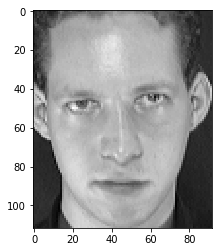

In [9]:
zzz=xx[:, minIndex(L)]
zzzz=np.reshape(zzz,(112, 92))
zzzz
zx=zzzz*255
print("this picture is recognized:")
plt.imshow(zx, cmap='gray', vmin=0, vmax=255)